In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# download the dataset
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

In [ ]:
# split valdation and test images
x_val, y_val = x_val[: 9000], y_val[: 9000]
x_test, y_test = x_val[: 1000], y_val[: 1000]

In [ ]:
# image classes or categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

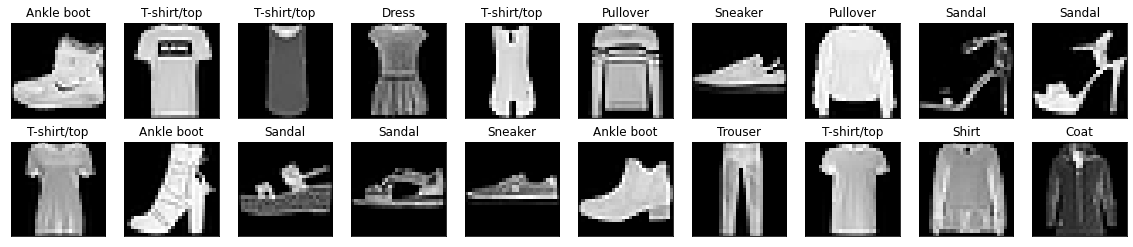

In [ ]:
# show some training images
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_train[idx], cmap = 'gray')
  plt.title(class_names[y_train[idx]])

In [ ]:
print("Number of Training Samples: ", len(x_train))
print("Number of Validation Samples: ", len(x_val))
print("Number of Test Samples: ", len(x_test))

Number of Training Samples:  60000
Number of Validation Samples:  9000
Number of Test Samples:  1000


In [ ]:
# shape of images
print("Shape of Training images: ", x_train.shape)
print("Shape of Validation images: ", x_val.shape)
print("Shape of Test images: ", x_test.shape)

Shape of Training images:  (60000, 28, 28)
Shape of Validation images:  (9000, 28, 28)
Shape of Test images:  (1000, 28, 28)


In [ ]:
# reshape for training and testing
x_train = x_train.reshape(60000, 28, 28, 1)
x_val = x_val.reshape(9000, 28, 28, 1)
x_test = x_test.reshape(1000, 28, 28, 1)

In [ ]:
# change data type
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# normalize data into range 1-0
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

In [ ]:
print("Training shape: ", x_train.shape)
print("Validation shape: ", x_val.shape)
print("Testing shape: ", x_test.shape)

Training shape:  (60000, 28, 28, 1)
Validation shape:  (9000, 28, 28, 1)
Testing shape:  (1000, 28, 28, 1)


In [ ]:
input_shape = (28, 28, 1)
batch_size = 32
epochs = 5

In [ ]:
# create model
model = Sequential()

# Step 1 - Convolution Layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = input_shape, activation = 'relu'))
# Step 2 - MaxPolling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = input_shape, activation = 'relu'))
# Step 2 - MaxPolling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flatten Layer
model.add(Flatten())

# Step 4 - Dense Layer
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

# summary of model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
# compile the model
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [ ]:
# Fit the model on dataset
history = model.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    batch_size = batch_size,
                    epochs = epochs)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4473 - accuracy: 0.8367 - val_loss: 0.3427 - val_accuracy: 0.8794
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3011 - accuracy: 0.8888 - val_loss: 0.3143 - val_accuracy: 0.8829
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2537 - accuracy: 0.9060 - val_loss: 0.2840 - val_accuracy: 0.8894
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2237 - accuracy: 0.9171 - val_loss: 0.2604 - val_accuracy: 0.9050
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1989 - accuracy: 0.9255 - val_loss: 0.2685 - val_accuracy: 0.9031


In [ ]:
# accuracy and loss of model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print()
print("Model Accuracy on test images: ", round(accuracy * 100, 2), "%")
print("Model Loss on test images: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.8990

Model Accuracy on test images:  89.9 %
Model Loss on test images:  0.27


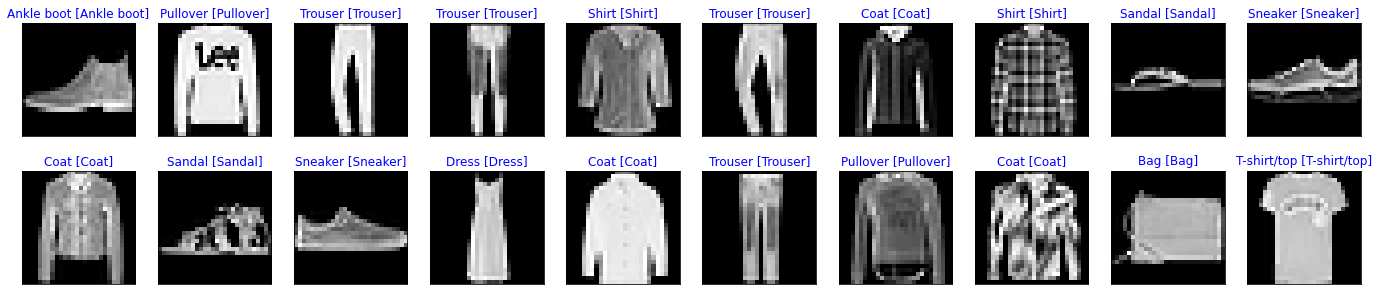

In [ ]:
# predict some testing images
predictions = model.predict(x_test)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)

**Create Adversarial Attack**

In [ ]:
#!pip install foolbox==2.4.0
import foolbox

## 1. Fast Gradient Sign Attack and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.FGSM(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)



In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)

adv_examples = adv_examples.reshape(1000, 28, 28, 1)
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 2.6146 - accuracy: 0.0770

Model accuraccy on Adversarial Example:  0.08 %
Model loss on Adversarial Example:  2.61


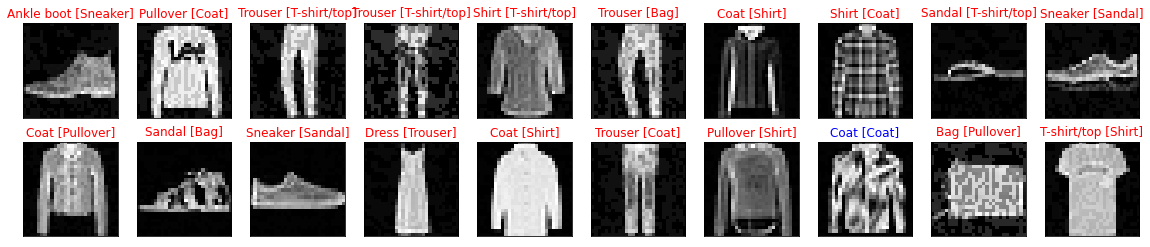

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

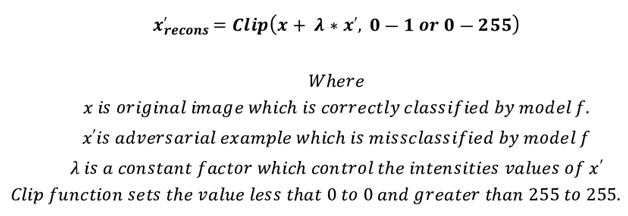

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.9040


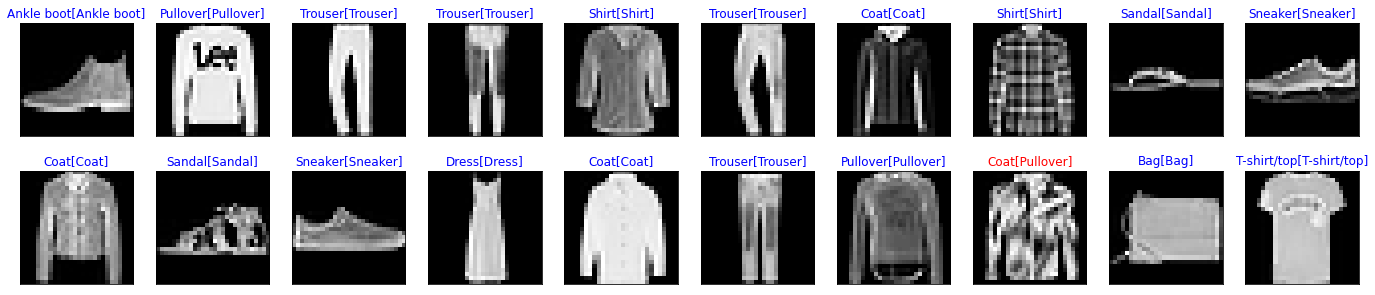

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

# 2. Basic Iterative Method (Attack) and Reconstruction of Adversarial Examples 

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.BIM(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)


In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.8308 - accuracy: 0.0620

Model accuraccy on Adversarial Example:  6.2 %
Model loss on Adversarial Example:  0.83


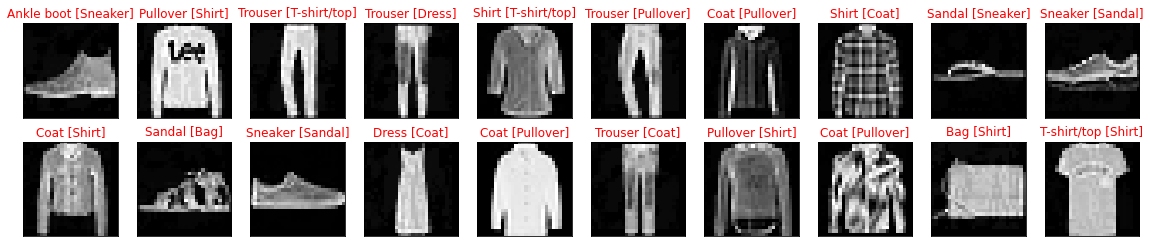

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

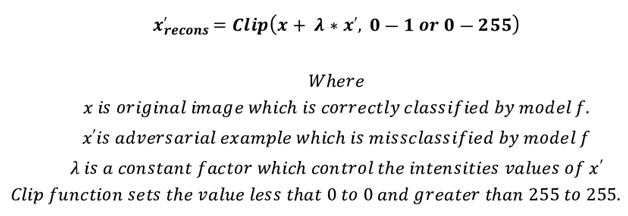

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.9170

Model accuraccy on Reconstructed Adversarial Example:  91.7 %
Model loss on Reconcostructed Adversarial Example:  0.26


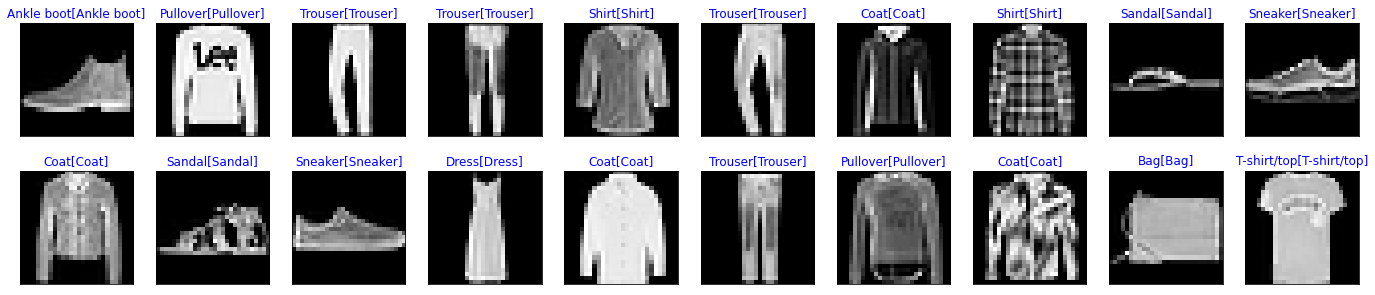

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

#Projected Gradient Descent Attack and Reconstruction of Adverasarial Examples

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.PGD(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.8207 - accuracy: 0.0610

Model accuraccy on Adversarial Example:  6.1 %
Model loss on Adversarial Example:  0.82


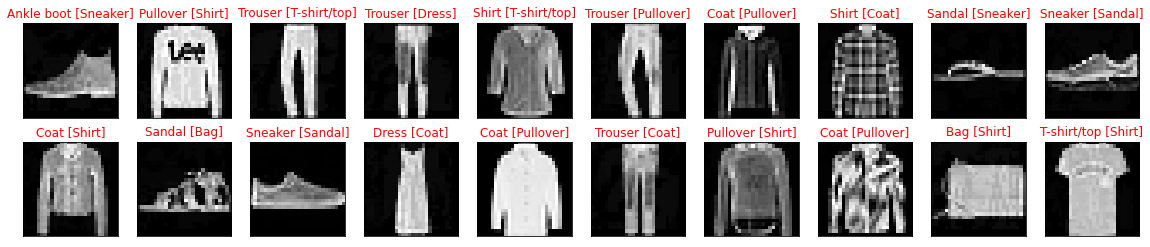

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

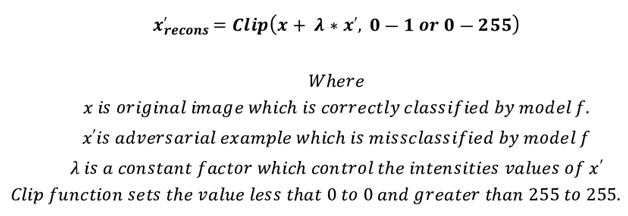

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.9180

Model accuraccy on Reconstructed Adversarial Example:  91.8 %
Model loss on Reconcostructed Adversarial Example:  0.26


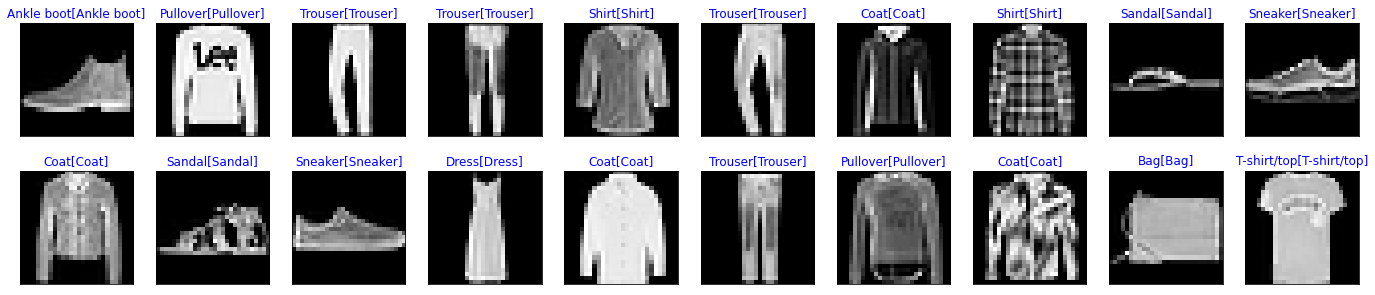

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

#Momentum Iterative Attack and Reconstruction of Adverasarial Examples

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.MomentumIterativeAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.8466 - accuracy: 0.0750

Model accuraccy on Adversarial Example:  7.5 %
Model loss on Adversarial Example:  0.85


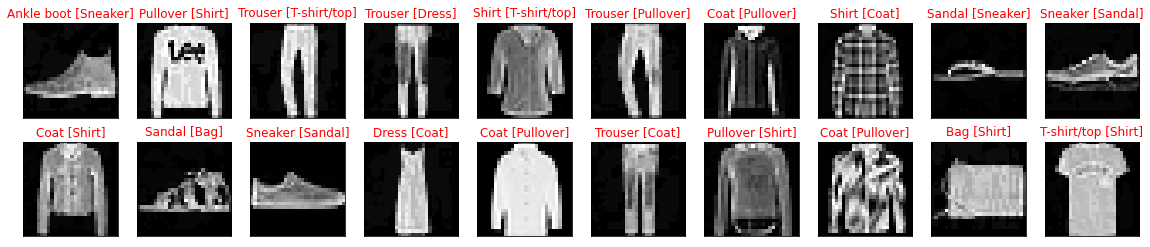

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

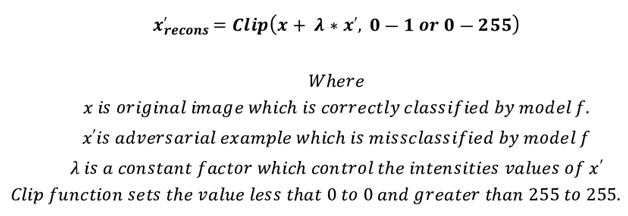

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.9100

Model accuraccy on Reconstructed Adversarial Example:  91.0 %
Model loss on Reconcostructed Adversarial Example:  0.29


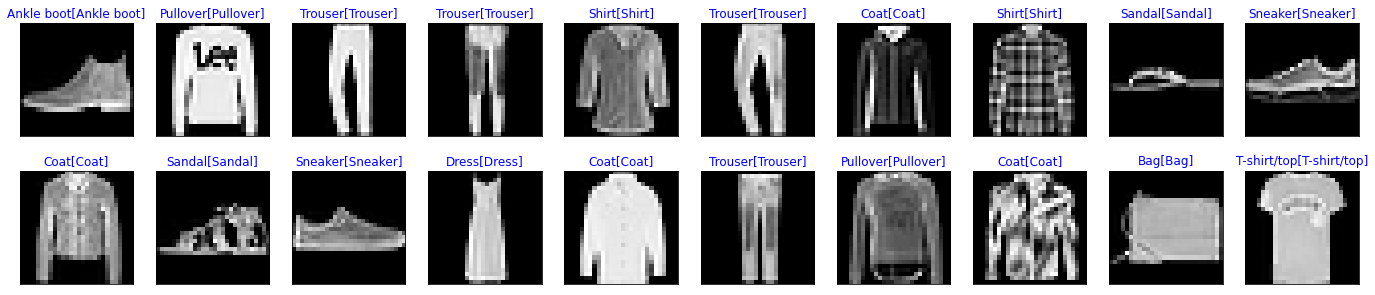

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

#Deep Fool Attack and Reconstruction of Adverasarial Examples

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.DeepFoolAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 937.2812 - accuracy: 0.0480

Model accuraccy on Adversarial Example:  4.8 %
Model loss on Adversarial Example:  937.28


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


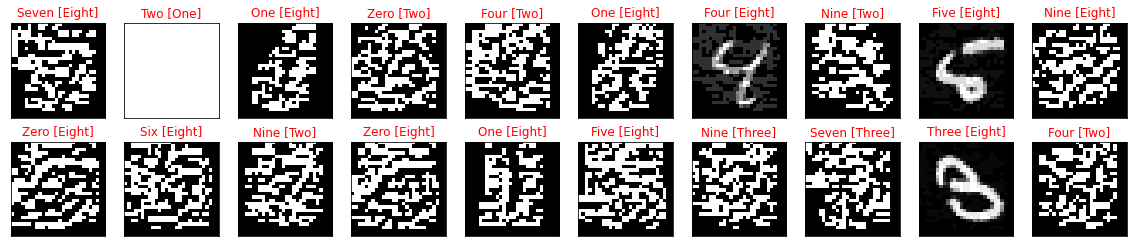

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

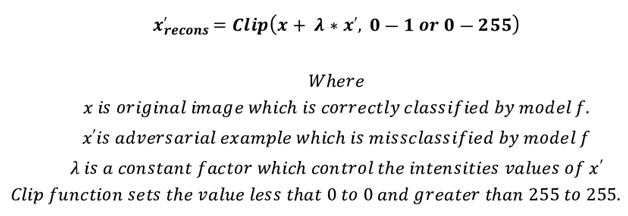

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 4.7360 - accuracy: 0.3360

Model accuraccy on Reconstructed Adversarial Example:  33.6 %
Model loss on Reconcostructed Adversarial Example:  4.74


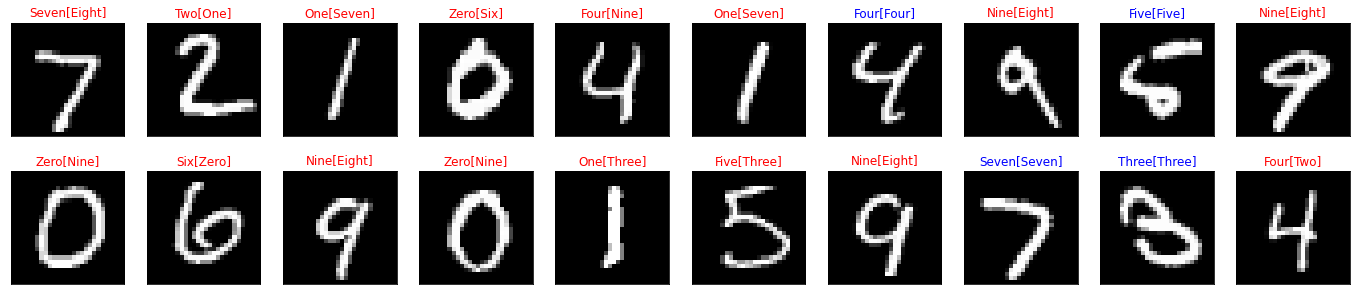

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

#Newton Fool Attack and Reconstruction of Adverasarial Examples

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.NewtonFoolAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 1.0638 - accuracy: 0.0790

Model accuraccy on Adversarial Example:  7.9 %
Model loss on Adversarial Example:  1.06


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


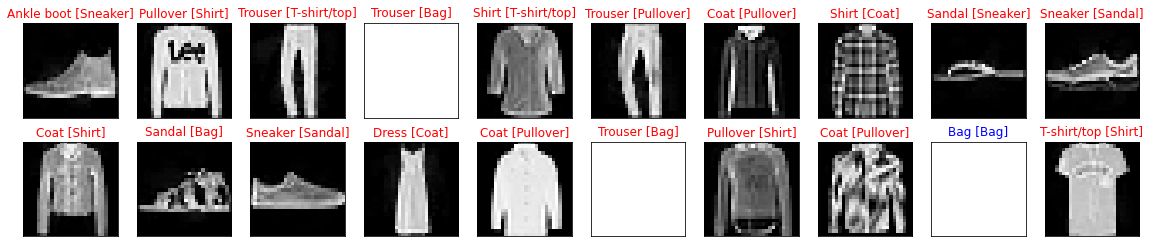

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

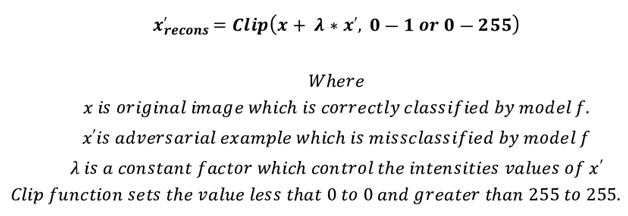

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.8630

Model accuraccy on Reconstructed Adversarial Example:  86.3 %
Model loss on Reconcostructed Adversarial Example:  0.56


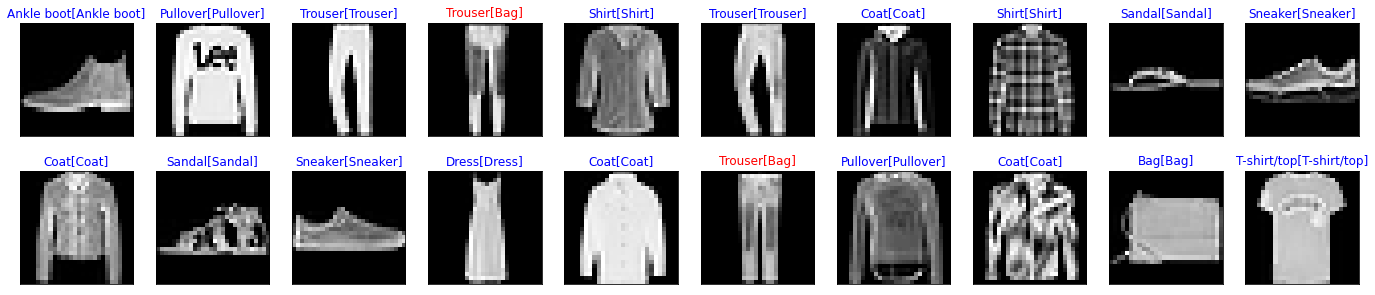

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

#A Def Attack and Reconstruction of Adverasarial Examples

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.ADefAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 3.2640 - accuracy: 0.1570

Model accuraccy on Adversarial Example:  15.7 %
Model loss on Adversarial Example:  3.26


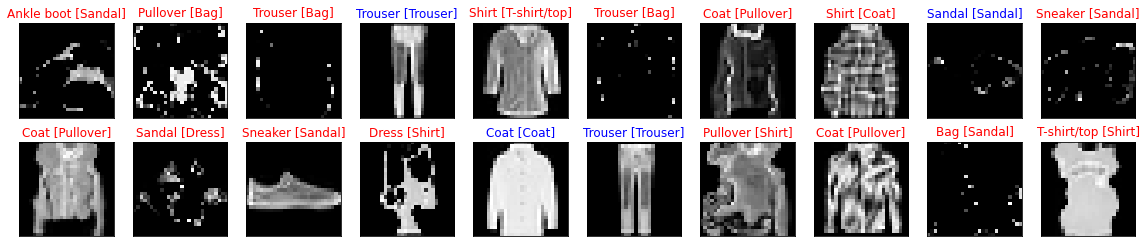

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

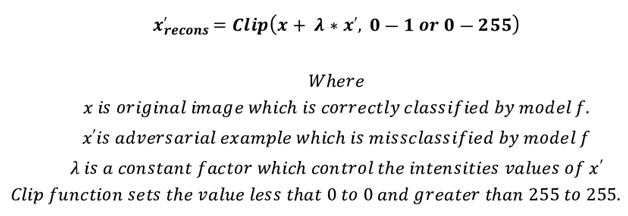

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8780

Model accuraccy on Reconstructed Adversarial Example:  87.8 %
Model loss on Reconcostructed Adversarial Example:  0.53


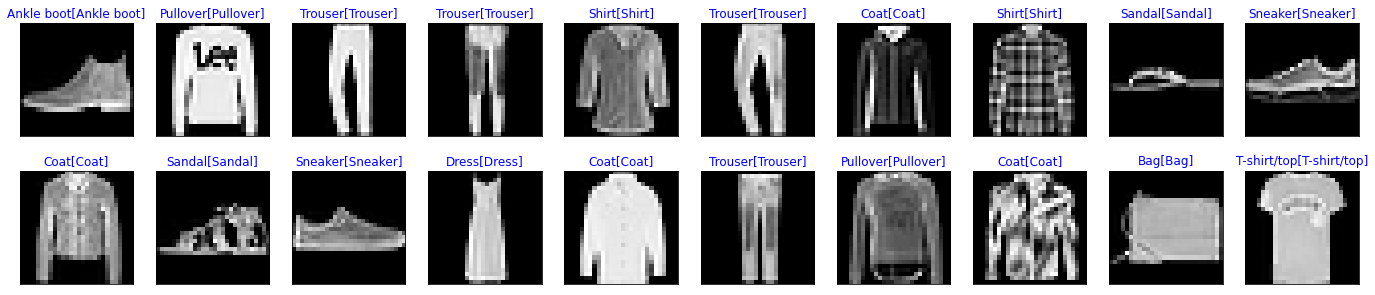

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

#Saliency Map Attack and Reconstruction of Adverasarial Examples

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.SaliencyMapAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.9665 - accuracy: 0.0940

Model accuraccy on Adversarial Example:  9.4 %
Model loss on Adversarial Example:  0.97


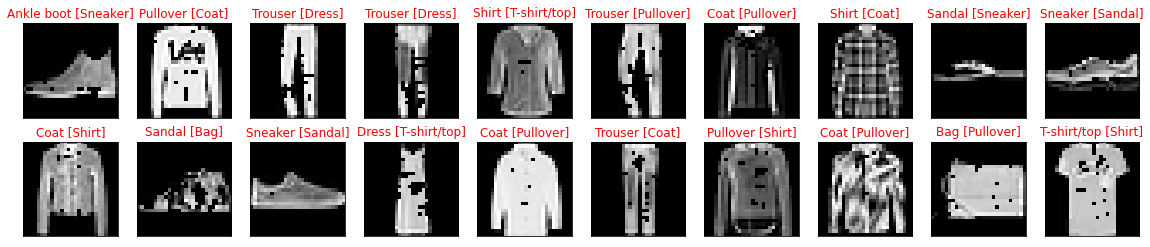

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

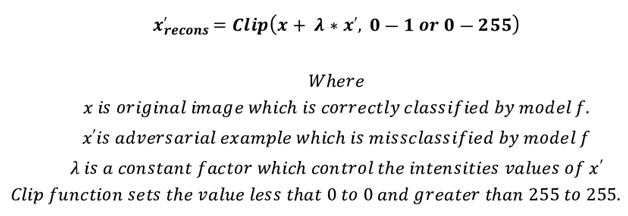

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9170

Model accuraccy on Reconstructed Adversarial Example:  91.7 %
Model loss on Reconcostructed Adversarial Example:  0.26


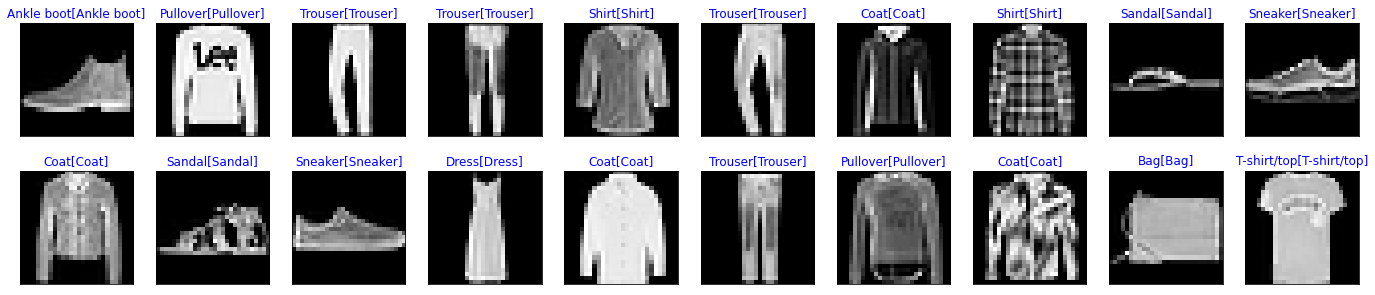

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

#Carlini & Wagner attack and Reconstruction of Adverasarial Examples

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.CarliniWagnerL2Attack(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.9210

Model accuraccy on Adversarial Example:  92.1 %
Model loss on Adversarial Example:  0.25


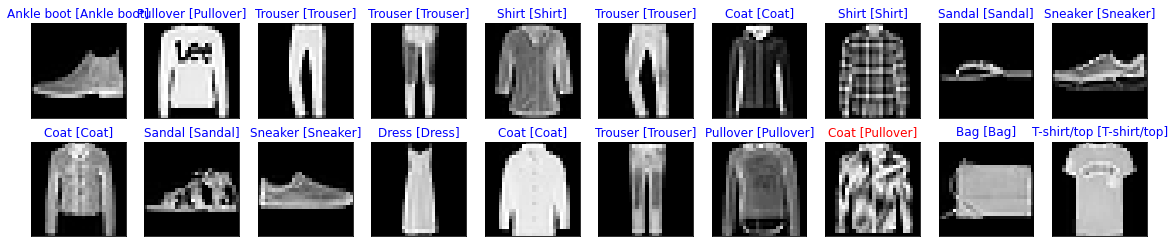

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

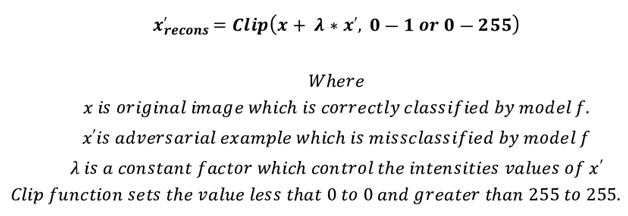

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9170

Model accuraccy on Reconstructed Adversarial Example:  91.7 %
Model loss on Reconcostructed Adversarial Example:  0.26


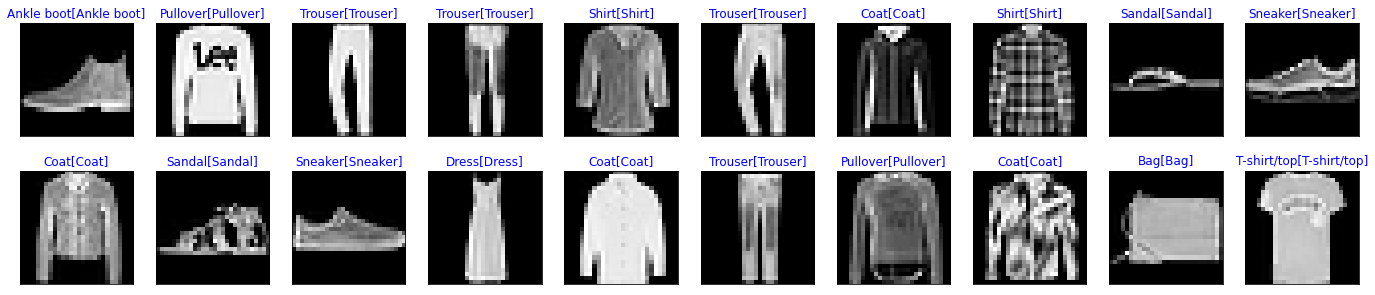

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

# Single Pixel attack and Reconstruction of Adverasarial Examples

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.SinglePixelAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 637.7357 - accuracy: 0.0050

Model accuraccy on Adversarial Example:  0.5 %
Model loss on Adversarial Example:  637.74


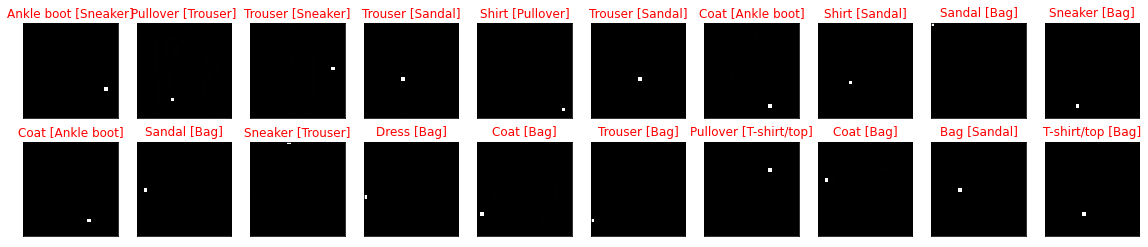

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

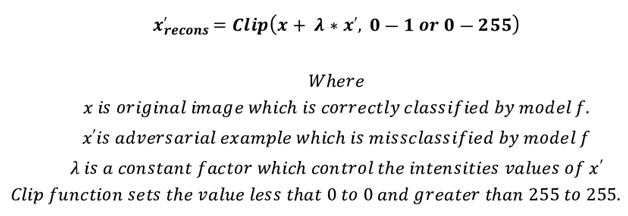

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.9210

Model accuraccy on Reconstructed Adversarial Example:  92.1 %
Model loss on Reconcostructed Adversarial Example:  0.26


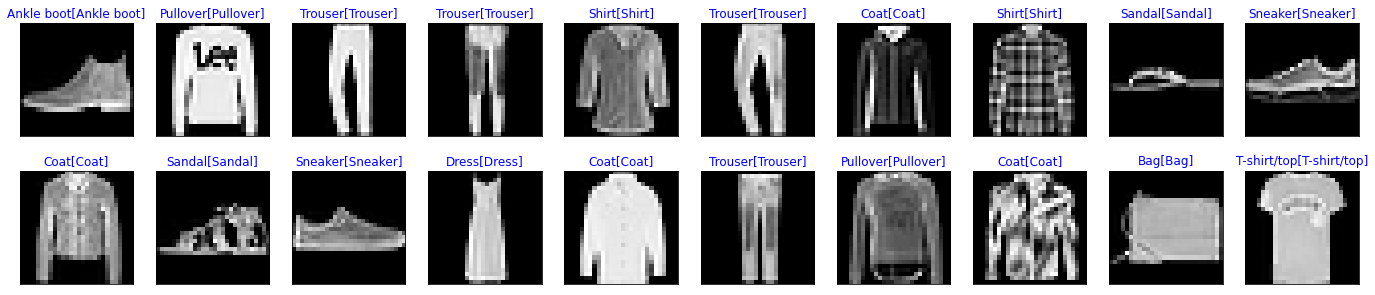

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Decision-based attacks**

# Spatial attack and Reconstruction of Adverasarial Examples

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.SpatialAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 4.0598 - accuracy: 0.0180

Model accuraccy on Adversarial Example:  1.8 %
Model loss on Adversarial Example:  4.06


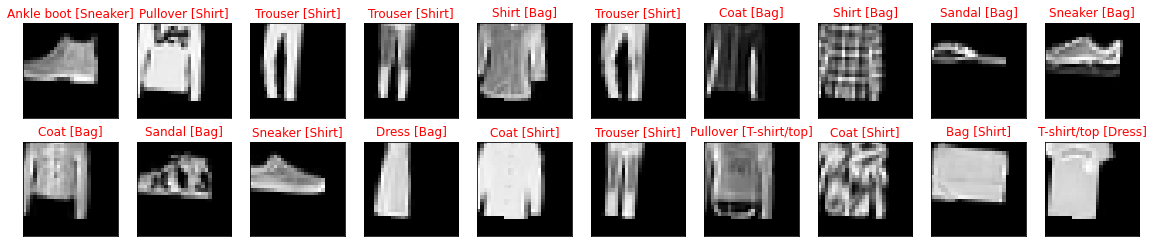

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

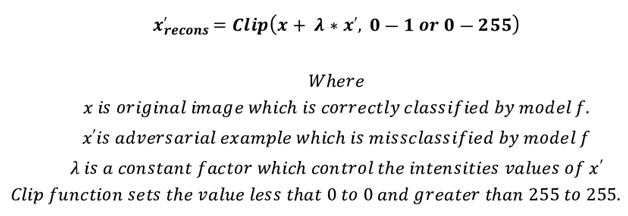

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.9160

Model accuraccy on Reconstructed Adversarial Example:  91.6 %
Model loss on Reconcostructed Adversarial Example:  0.26


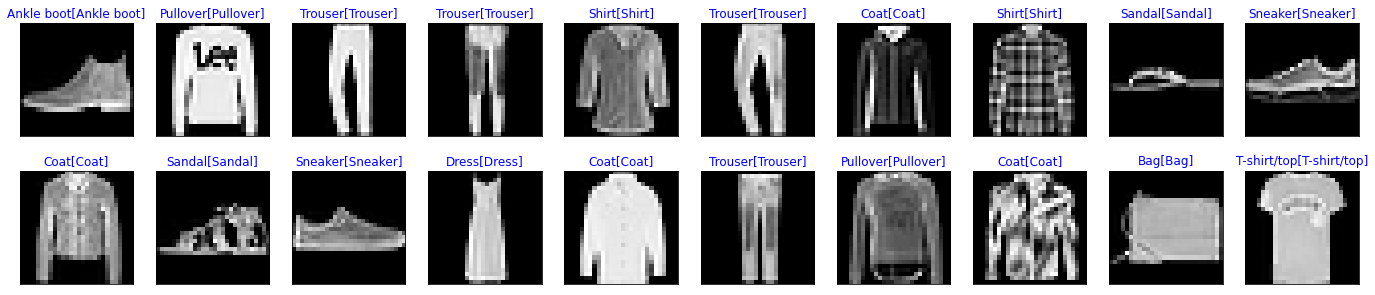

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

# Gassian Blur attack and Reconstruction of Adverasarial Examples

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.GaussianBlurAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples


adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 28, 28, 1), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:95: UserWarning: GaussianBlurAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  " attack.".format(self.name())


In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_examples = adv_examples.reshape(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 1.0937 - accuracy: 0.1160

Model accuraccy on Adversarial Example:  11.6 %
Model loss on Adversarial Example:  1.09


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


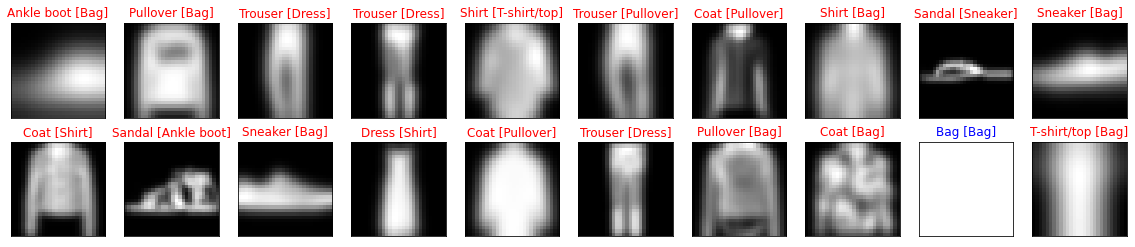

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(adv_examples[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[y_test[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Reconstruction of Adversarila Examples**

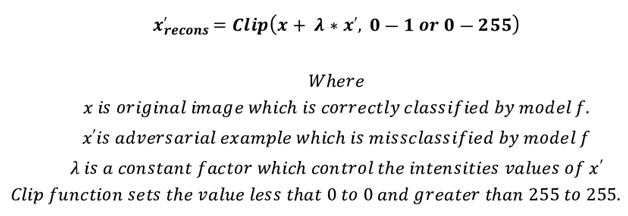

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

print()
print("Model accuraccy on Reconstructed Adversarial Example: ", round(accuracy*100, 2), "%")
print("Model loss on Reconcostructed Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.9170

Model accuraccy on Reconstructed Adversarial Example:  91.7 %
Model loss on Reconcostructed Adversarial Example:  0.29


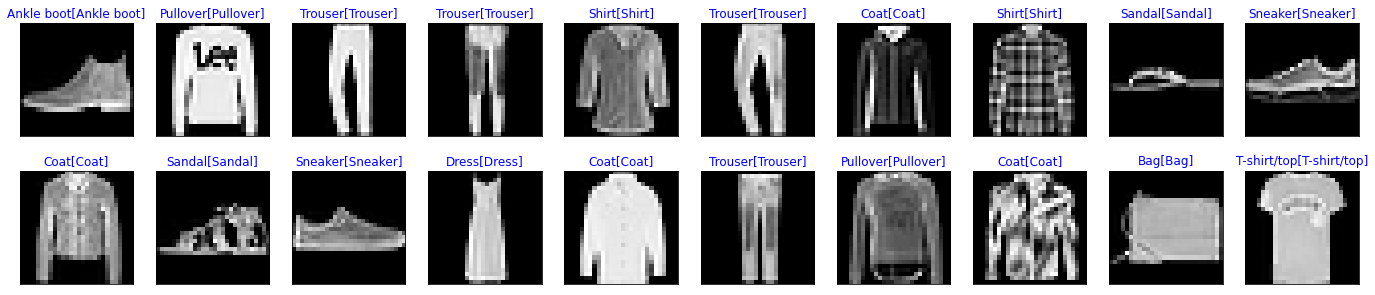

In [ ]:
# predict some testing images
predictions = model.predict(adv_example_recons)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title( class_names[y_test[idx]] + '[' + class_names[np.argmax(predictions[idx])] + ']', color = color)

**Decision-based attacks**